# Top 10 movies of all time

Given [MovieLens dataset](https://grouplens.org/datasets/movielens/) we rank movies using following aggregation strategies

 - Arithmetic Average
 - Artihmetic Average with number of reviews
 - Cumulative Rating
 - Bayesian Average

A detail blog post has been compiled on the findings; and you can find it at [Solving an age-old problem with Bayesian Average](https://arpitbhayani.me/blogs/bayesian-average).

In [1]:
import random
import pandas as pd

In [2]:
df = pd.read_csv("./ml-latest-small/ratings.csv")
ndf = pd.read_csv("./ml-latest-small/movies.csv")

In [3]:
ndf = ndf.drop('genres', axis=1)

In [4]:
ndf = ndf.set_index('movieId')

In [5]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ndf.head()

,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)


In [7]:
MOVIE_ID = 119145

In [8]:
all_aa_ratings_count_df = pd.DataFrame(df.groupby('movieId')["rating"].count())
all_aa_ratings_count_df.rename(columns = {'rating':'ratings_count'}, inplace = True)

In [9]:
all_aa = df.groupby('movieId').mean()

In [10]:
all_aa = all_aa.join(ndf).join(all_aa_ratings_count_df)

In [11]:
all_aa = all_aa.drop(['userId', 'timestamp'], axis=1)

## Ranking movies on arithmetic mean (average)

In [12]:
all_aa1 = all_aa.sort_values(['rating'], ascending=False)

In [13]:
all_aa1['rank'] = all_aa1.rating.rank(pct=True, ascending=True)

In [14]:
all_aa1[:10]

,rating,title,ratings_count,rank
movieId,,,,
88448,5.0,Paper Birds (Pájaros de papel) (2010),1,0.984831
100556,5.0,"Act of Killing, The (2012)",1,0.984831
143031,5.0,Jump In! (2007),1,0.984831
143511,5.0,Human (2015),1,0.984831
143559,5.0,L.A. Slasher (2015),1,0.984831
6201,5.0,Lady Jane (1986),1,0.984831
102217,5.0,Bill Hicks: Revelations (1993),1,0.984831
102084,5.0,Justice League: Doom (2012),1,0.984831
6192,5.0,Open Hearts (Elsker dig for evigt) (2002),1,0.984831


In [15]:
all_aa1[all_aa1.index == MOVIE_ID]

,rating,title,ratings_count,rank
movieId,,,,
119145,3.986111,Kingsman: The Secret Service (2015),36,0.765631


## Ranking movies on arithmetic mean and ratings count

In [16]:
all_aa2 = all_aa.sort_values(['rating', 'ratings_count'], ascending=False)

In [17]:
all_aa2['rank'] = all_aa2.rating.rank(pct=True, ascending=True)

In [18]:
all_aa2[:10]

,rating,title,ratings_count,rank
movieId,,,,
53,5.0,Lamerica (1994),2,0.984831
99,5.0,Heidi Fleiss: Hollywood Madam (1995),2,0.984831
1151,5.0,Lesson Faust (1994),2,0.984831
3473,5.0,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,2,0.984831
6442,5.0,Belle époque (1992),2,0.984831
6818,5.0,Come and See (Idi i smotri) (1985),2,0.984831
78836,5.0,Enter the Void (2009),2,0.984831
148,5.0,"Awfully Big Adventure, An (1995)",1,0.984831
467,5.0,Live Nude Girls (1995),1,0.984831


In [19]:
all_aa2[all_aa2.index == MOVIE_ID]

,rating,title,ratings_count,rank
movieId,,,,
119145,3.986111,Kingsman: The Secret Service (2015),36,0.765631


## Ranking on cumulative score


In [20]:
all_ca1 = df.groupby('movieId').sum().sort_values(['rating'], ascending=False)

In [21]:
all_ca1 = all_ca1.drop(['userId', 'timestamp'], axis=1)

In [22]:
all_ca1['rank'] = all_ca1.rating.rank(pct=True, ascending=True)

In [23]:
all_ca1 = all_ca1.join(ndf).join(all_aa_ratings_count_df)

In [24]:
all_ca1[:10]

,rating,rank,title,ratings_count
movieId,,,,
318,1404.0,1.000000,"Shawshank Redemption, The (1994)",317
356,1370.0,0.999897,Forrest Gump (1994),329
296,1288.5,0.999794,Pulp Fiction (1994),307
2571,1165.5,0.999691,"Matrix, The (1999)",278
593,1161.0,0.999589,"Silence of the Lambs, The (1991)",279
260,1062.0,0.999486,Star Wars: Episode IV - A New Hope (1977),251
110,955.5,0.999383,Braveheart (1995),237
2959,931.5,0.999280,Fight Club (1999),218
527,929.5,0.999177,Schindler's List (1993),220


In [25]:
all_ca1[all_ca1.index == MOVIE_ID]

,rating,rank,title,ratings_count
movieId,,,,
119145,143.5,0.937937,Kingsman: The Secret Service (2015),36


## Ranking movies on Bayesian average

In [26]:
avg_rating = df['rating'].mean()

In [27]:
avg_count_rating = df.groupby("movieId")['rating'].count().mean()

In [28]:
count_ratings = df.groupby("movieId").count()['rating']

In [29]:
adf = pd.DataFrame(count_ratings, columns=['rating'])

In [30]:
adf.rename(columns = {'rating':'ratings_count'}, inplace = True)

In [31]:
adf['avg_rating'] = df.groupby('movieId').mean()['rating']

In [32]:
adf['overall_avg_rating'] = avg_rating

In [33]:
adf['overall_avg_count_rating'] = avg_count_rating

In [34]:
adf['w'] = adf['ratings_count']/(adf['overall_avg_count_rating'] + adf['ratings_count'])

In [35]:
adf['aa'] = all_aa.rating

In [36]:
adf['ba'] = adf['w'] * adf['avg_rating'] + (1-adf['w']) * adf['overall_avg_rating']

In [37]:
adf['rank'] = adf.ba.rank(pct=True, ascending=True)

In [38]:
adf.sort_values('ba', ascending=False)[:10].join(ndf)

,ratings_count,avg_rating,overall_avg_rating,overall_avg_count_rating,w,aa,ba,rank,title
movieId,,,,,,,,,
318,317,4.429022,3.501557,10.369807,0.968324,4.429022,4.399644,1.000000,"Shawshank Redemption, The (1994)"
858,192,4.289062,3.501557,10.369807,0.948758,4.289062,4.248709,0.999897,"Godfather, The (1972)"
2959,218,4.272936,3.501557,10.369807,0.954592,4.272936,4.237909,0.999794,Fight Club (1999)
1221,129,4.259690,3.501557,10.369807,0.925595,4.259690,4.203281,0.999691,"Godfather: Part II, The (1974)"
50,204,4.237745,3.501557,10.369807,0.951627,4.237745,4.202133,0.999589,"Usual Suspects, The (1995)"
260,251,4.231076,3.501557,10.369807,0.960325,4.231076,4.202132,0.999486,Star Wars: Episode IV - A New Hope (1977)
750,97,4.268041,3.501557,10.369807,0.903420,4.268041,4.194014,0.999383,Dr. Strangelove or: How I Learned to Stop Worr...
1213,126,4.250000,3.501557,10.369807,0.923958,4.250000,4.193087,0.999280,Goodfellas (1990)
527,220,4.225000,3.501557,10.369807,0.954986,4.225000,4.192435,0.999177,Schindler's List (1993)


In [39]:
adf[adf.index == MOVIE_ID]

,ratings_count,avg_rating,overall_avg_rating,overall_avg_count_rating,w,aa,ba,rank
movieId,,,,,,,,
119145,36,3.986111,3.501557,10.369807,0.776367,3.986111,3.877749,0.974496


## Computing how rank changes as and when we see more ratings

In [40]:
def all_positions(movieId):
    df = pd.read_csv("./ml-latest-small/ratings.csv")
    df_ratings_for_movie = df[df.movieId == movieId].sort_values('timestamp', ascending=False)
    df = df.drop(df[df.movieId == movieId].index)
    
    pos = []
    
    items_proc = 0
    count = 1
    itr = df_ratings_for_movie.itertuples()
    not_done = True
    while not_done:
        
        tuples = []
        for _ in range(count):
            try:
                t = next(itr)
                tuples.append(t)
            except StopIteration:
                not_done = False
                break
        
        items_proc += len(tuples)
        
        df = df.append(tuples, ignore_index=True)
        all_aa = df.groupby('movieId')["rating"].mean().sort_values(ascending=False)
        avg_rating = df['rating'].mean()
        avg_count_rating = df.groupby("movieId")['rating'].count().mean()
        count_ratings = df.groupby("movieId").count()['rating']
        adf = pd.DataFrame(count_ratings, columns=['rating'])
        adf.rename(columns = {'rating':'ratings_count'}, inplace = True)
        adf['avg_rating'] = df.groupby('movieId').mean()['rating']
        adf['overall_avg_rating'] = avg_rating
        adf['overall_avg_count_rating'] = avg_count_rating
        adf['w'] = adf['ratings_count']/(adf['overall_avg_count_rating'] + adf['ratings_count'])
        adf['aa'] = all_aa
        adf['ba'] = adf['w'] * adf['avg_rating'] + (1-adf['w']) * adf['overall_avg_rating']
        adf['ba_rank'] = adf.ba.rank(pct=True)
        adf['aa_rank'] = adf.aa.rank(pct=True)

        pos.append(adf[adf.index == movieId])
        
    return pos

In [41]:
x = pd.concat(all_positions(MOVIE_ID))

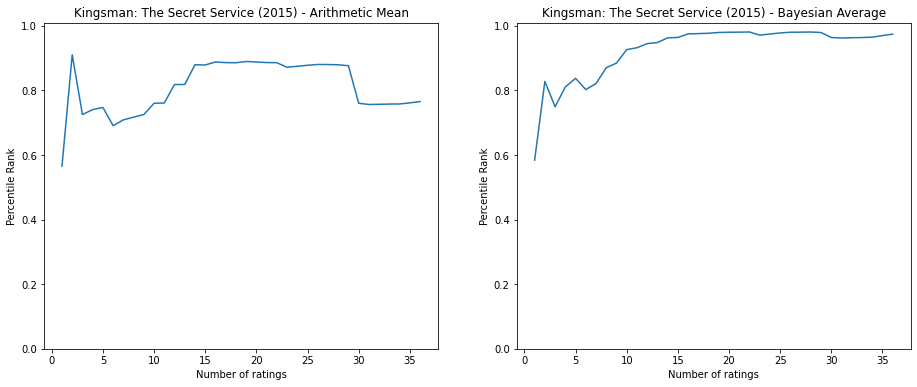

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.title(ndf[ndf.index == MOVIE_ID].values[0][0] + " - Arithmetic Mean")
plt.plot(list(x.ratings_count), list(x.aa_rank))
plt.ylabel('Percentile Rank')
plt.xlabel('Number of ratings')
plt.ylim(0, 1.01)
plt.subplot(132)
plt.title(ndf[ndf.index == MOVIE_ID].values[0][0] + " - Bayesian Average")
plt.ylabel('Percentile Rank')
plt.xlabel('Number of ratings')
plt.plot(list(x.ratings_count), list(x.ba_rank))
plt.ylim(0, 1.01)
plt.show()